/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


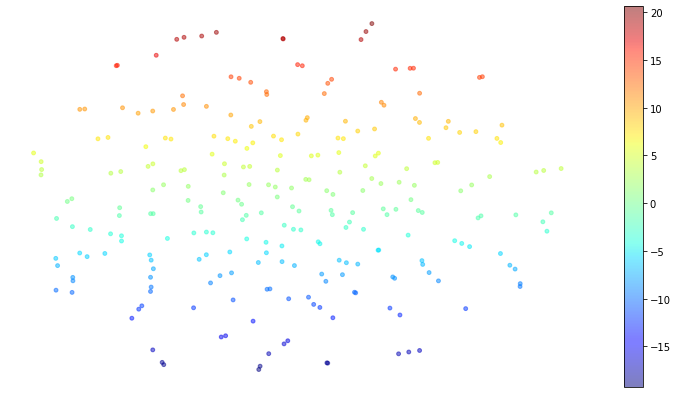

In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.manifold import TSNE
import sklearn.preprocessing as sp

H, W = 256, 256

def tsne_plot(vector2d):
    tsne = TSNE(n_components=2, random_state=41)
    X_reduced = tsne.fit_transform(vector2d)
    plt.figure(figsize=(13, 7))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
                c=X_reduced[:, 1], cmap='jet',
                s=15, alpha=0.5)
    plt.axis('off')
    plt.colorbar()
    plt.show()

def normarize(X, MinMax=True):
    if MinMax:
        Xs = sp.MinMaxScaler().fit_transform(X)
    else:
        sc = sp.StandardScaler()
        Xs = sc.fit_transform(X)
    return Xs


def equalizeHist(img):
    if len(img.shape)==3:
        for j in range(3):
            img[:, :, j] = cv2.equalizeHist(img[:, :, j])
    elif len(img.shape)==2:
        img = cv2.equalizeHist(img)
    return img

def clipping(img_, clip_max=255):
    img = img_ * 255
    return img.clip(0, clip_max).astype('uint8')

def resize(img, h, w):
    return cv2.resize(img, (h, w), interpolation=cv2.INTER_NEAREST)


path='../samples/image'
im1 = cv2.imread(os.path.join(path, '0_VV.tif'), -1)
im2 = cv2.imread(os.path.join(path, '0_VH.tif'), -1)
im3 = cv2.imread(os.path.join(path, '1_VV.tif'), -1)
im4 = cv2.imread(os.path.join(path, '1_VH.tif'), -1)
test = cv2.imread(os.path.join(path, 'test.png'), 0)
im1, im2, im3, im4, test = clipping(im1), clipping(im2), clipping(im3), clipping(im4), clipping(test)
im1, im2, im3, im4, test = equalizeHist(im1), equalizeHist(im2), equalizeHist(im3), equalizeHist(im4), equalizeHist(test)
im1, im2, im3, im4, test = resize(im1, H, W), resize(im2, H, W), resize(im3, H, W), resize(im4, H, W), resize(test, H, W)
im1, im2, im3, im4, test = im1/255, im2/255, im3/255, im4/255, test/255
im5 = (im3 - im1)+(im4-im2)
tsne_plot(im5)

sar1


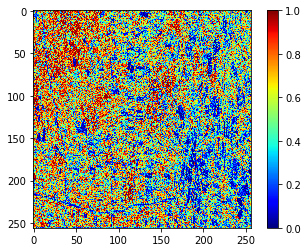

sar2


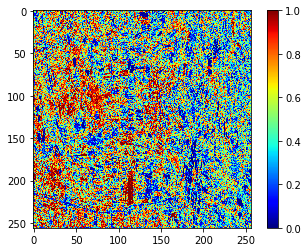

test


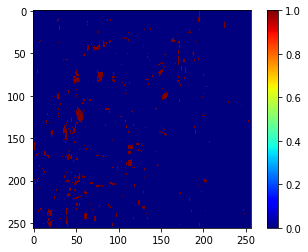

In [3]:
def heatmaps(vh, vv, test):
    plt.figure()
    print('sar1')
    plt.imshow(vh,interpolation='nearest',vmin=0,vmax=1,cmap='jet')
    plt.colorbar()
    plt.show()
    print('sar2')
    plt.imshow(vv,interpolation='nearest',vmin=0,vmax=1,cmap='jet')
    plt.colorbar()
    plt.show()
    print('test')
    plt.imshow(test,interpolation='nearest',vmin=0,vmax=1,cmap='jet')
    plt.colorbar()
    plt.show()
    
heatmaps(im2, im1, test)

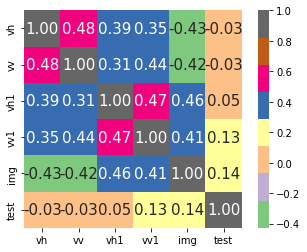

In [4]:
def create_df(vh, vv, vh1, vv1, img, test):
    '''1d pandas dataframe'''
    vv, vv1 = np.ravel(vv), np.ravel(vv1)
    vh, vh1 = np.ravel(vh), np.ravel(vh1)
    img, test = np.ravel(img), np.ravel(test)
    d = {'vv': vv, 'vh': vh, 'vh1': vh1, 'vv1': vv1, 'img': img, 'test':test}
    return pd.DataFrame(data=d)#.plot()#.get_figure().savefig('df1.png')


def correlation_map(df):
    colmuns = ['vh', 'vv', 'vh1', 'vv1', 'img', 'test']
    cr = df[colmuns].corr()
    heatmap = sns.heatmap(cr,cbar=True,annot=True,square=True,fmt='.2f',
                          annot_kws={'size': 15},yticklabels=colmuns,xticklabels=colmuns,cmap='Accent')

#cr_heatmap(im2, im1, im4, im3, im5, test, plot=True)
csvs = create_df(im2, im1, im4, im3, im5, test)
correlation_map(csvs)